This notebook represents my work on Coursera Data Science Professional Certificate Capstone project. 
The aim of the project is to choose a publicly available data set regarding traffic accident data and create a model based on it for a./ predicting the possibility of an accident on certain conditions as well as b./ the severity of the potential accident.

In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
print('Hello Capstone Project Course!')

Hello Capstone Project Course!


## Overview of the original data

I've decided to use UK government traffic accident data from 2018. This is availble through my account in data.world website.

In [3]:
df_2018 = pd.read_csv('https://query.data.world/s/ltzs6dkwyzm7qem2cdbc4vrocal5nq')

In [4]:
df_2018.shape

(1995, 21)

In [5]:
df_2018.head()

,Accident Fields_Reference Number,Grid Ref: Easting,Grid Ref: Northing,Number of Vehicles,Accident Date,Time (24hr),1st Road Class,1st Road Class & No,Road Surface,Lighting Conditions,...,Local Authority,Vehicle Fields_Reference Number,Vehicle Number,Type of Vehicle,Casualty Fields_Reference Number,Casualty Veh No,Casualty Class,Casualty Severity,Sex of Casualty,Age of Casualty
0,51B0230,433936,428874,1,11/01/2018,700,6,U,1,4,...,E08000035,51B0230,1,9,51B0230,1,3,3,2,87
1,51B0349,430076,433872,1,11/01/2018,855,6,U,2,1,...,E08000035,51B0349,1,11,51B0349,1,2,3,2,60
2,51B0349,430076,433872,1,11/01/2018,855,6,U,2,1,...,E08000035,51B0349,1,11,51B0349,1,2,3,2,51
3,51B0349,430076,433872,1,11/01/2018,855,6,U,2,1,...,E08000035,51B0349,1,11,51B0349,1,2,3,2,50
4,51B0349,430076,433872,1,11/01/2018,855,6,U,2,1,...,E08000035,51B0349,1,11,51B0349,1,2,3,2,51


In [6]:
df_2018.columns

Index(['Accident Fields_Reference Number', 'Grid Ref: Easting',
       'Grid Ref: Northing', 'Number of Vehicles', 'Accident Date',
       'Time (24hr)', '1st Road Class', '1st Road Class & No', 'Road Surface',
       'Lighting Conditions', 'Weather Conditions', 'Local Authority',
       'Vehicle Fields_Reference Number', 'Vehicle Number', 'Type of Vehicle',
       'Casualty Fields_Reference Number', 'Casualty Veh No', 'Casualty Class',
       'Casualty Severity', 'Sex of Casualty', 'Age of Casualty'],
      dtype='object')

In [7]:
df_2018.dtypes

Accident Fields_Reference Number    object
Grid Ref: Easting                    int64
Grid Ref: Northing                   int64
Number of Vehicles                   int64
Accident Date                       object
Time (24hr)                          int64
1st Road Class                       int64
1st Road Class & No                 object
Road Surface                         int64
Lighting Conditions                  int64
Weather Conditions                   int64
Local Authority                     object
Vehicle Fields_Reference Number     object
Vehicle Number                       int64
Type of Vehicle                      int64
Casualty Fields_Reference Number    object
Casualty Veh No                      int64
Casualty Class                       int64
Casualty Severity                    int64
Sex of Casualty                      int64
Age of Casualty                      int64
dtype: object

In [8]:
df_2018[['Accident Fields_Reference Number','Number of Vehicles','Accident Date','Time (24hr)','Age of Casualty']].describe(include='all')

,Accident Fields_Reference Number,Number of Vehicles,Accident Date,Time (24hr),Age of Casualty
count,1995,1995.000000,1995,1995.000000,1995.000000
unique,1548,NaN,354,NaN,NaN
top,58K1318,NaN,30/06/2018,NaN,NaN
freq,9,NaN,19,NaN,NaN
mean,NaN,1.919298,NaN,1409.368421,36.993985
std,NaN,0.723584,NaN,505.175755,18.856635
min,NaN,1.000000,NaN,0.000000,1.000000
25%,NaN,1.000000,NaN,1047.500000,23.000000
50%,NaN,2.000000,NaN,1503.000000,35.000000
75%,NaN,2.000000,NaN,1754.000000,50.000000


In [9]:
df_descriptions = pd.read_csv('https://query.data.world/s/gfafx3a433phshsqg47jukqisk5k6b')
df_descriptions

,Feature Group,Code,Description
0,1st Road Class,1,Motorway
1,1st Road Class,2,A(M)
2,1st Road Class,3,A
3,1st Road Class,4,B
4,1st Road Class,5,C
5,1st Road Class,6,Unclassified
6,Road Surface,1,Dry
7,Road Surface,2,Wet / Damp
8,Road Surface,3,Snow
9,Road Surface,4,Frost / Ice


Remove columns that are not relevant for the data to simplify the data set.

In [10]:
df_2018.drop(columns=['Grid Ref: Easting',
              'Grid Ref: Northing',
              '1st Road Class & No',
              'Local Authority',
              'Vehicle Fields_Reference Number', 
              'Vehicle Number',
              'Casualty Fields_Reference Number', 
              'Casualty Veh No'],inplace=True)
df_2018.rename(columns={'Accident Fields_Reference Number':'Accident Ref No'}, inplace=True)
df_2018.head()

,Accident Ref No,Number of Vehicles,Accident Date,Time (24hr),1st Road Class,Road Surface,Lighting Conditions,Weather Conditions,Type of Vehicle,Casualty Class,Casualty Severity,Sex of Casualty,Age of Casualty
0,51B0230,1,11/01/2018,700,6,1,4,1,9,3,3,2,87
1,51B0349,1,11/01/2018,855,6,2,1,1,11,2,3,2,60
2,51B0349,1,11/01/2018,855,6,2,1,1,11,2,3,2,51
3,51B0349,1,11/01/2018,855,6,2,1,1,11,2,3,2,50
4,51B0349,1,11/01/2018,855,6,2,1,1,11,2,3,2,51


## FEATURE BY FEATURE INSIGHTS

In [11]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

### Casualty Severity

In [12]:
df_2018['Casualty Severity'].value_counts()

3    1658
2     311
1      26
Name: Casualty Severity, dtype: int64

In [13]:
## Add a column with severity description to dataset
df_2018['Casualty Severity Description'] = np.where(df_2018['Casualty Severity'] == 1, 'Fatal Injuries', 
                                    np.where(df_2018['Casualty Severity'] == 2, 'Serious Injuries', 
                                    np.where(df_2018['Casualty Severity'] == 3, 'Light Injuries', 'NA'
                                    )))

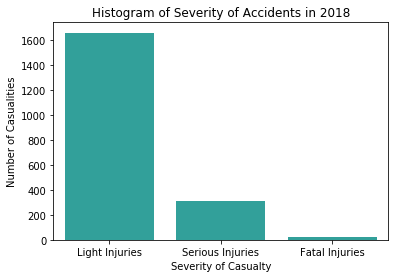

In [14]:
sns.countplot(x='Casualty Severity Description', data=df_2018, color='lightseagreen')
plt.title('Histogram of Severity of Accidents in 2018') 
plt.ylabel('Number of Casualities')
plt.xlabel('Severity of Casualty')
plt.show()

In [15]:
# how many of all the Casualty Severities are serious or fatal?
df_2018['Casualty Severity'].value_counts(normalize=True)

3    0.831078
2    0.155890
1    0.013033
Name: Casualty Severity, dtype: float64

### Time of Day 

In [16]:
# break down the 24h times into times of day
df_2018['Time of day'] = np.where((df_2018['Time (24hr)'] <500),'Night',             
                                np.where((df_2018['Time (24hr)'] >2230), 'Night',
                                np.where(((df_2018['Time (24hr)'] >=500) & (df_2018['Time (24hr)'] <700)), 'Early Morning', 
                                np.where(((df_2018['Time (24hr)'] >=700) & (df_2018['Time (24hr)'] <930)), 'Morning Rush Hour',
                                np.where(((df_2018['Time (24hr)'] >=930) & (df_2018['Time (24hr)'] <1200)), 'Late Morning',
                                np.where(((df_2018['Time (24hr)'] >=1200) & (df_2018['Time (24hr)'] <1600)), 'Afternoon',
                                np.where(((df_2018['Time (24hr)'] >=1600) & (df_2018['Time (24hr)'] <1900)), 'Afternoon Rush Hour',
                                np.where(((df_2018['Time (24hr)'] >=1900) & (df_2018['Time (24hr)'] <=2230)), 'Evening', 'NA'
                             ))))))))

In [17]:
df_2018['Time of day'].value_counts(ascending=False)

Afternoon              559
Afternoon Rush Hour    499
Evening                276
Morning Rush Hour      260
Late Morning           208
Night                  158
Early Morning           35
Name: Time of day, dtype: int64

In [18]:
Time_of_day_casualties=df_2018.groupby(['Time of day'])['Casualty Severity Description'].value_counts()
Time_of_day_danger=pd.DataFrame(Time_of_day_casualties.reset_index(name = "Casualty_Count"))
Time_of_day_danger

,Time of day,Casualty Severity Description,Casualty_Count
0,Afternoon,Light Injuries,476
1,Afternoon,Serious Injuries,77
2,Afternoon,Fatal Injuries,6
3,Afternoon Rush Hour,Light Injuries,419
4,Afternoon Rush Hour,Serious Injuries,76
5,Afternoon Rush Hour,Fatal Injuries,4
6,Early Morning,Light Injuries,30
7,Early Morning,Serious Injuries,4
8,Early Morning,Fatal Injuries,1
9,Evening,Light Injuries,221


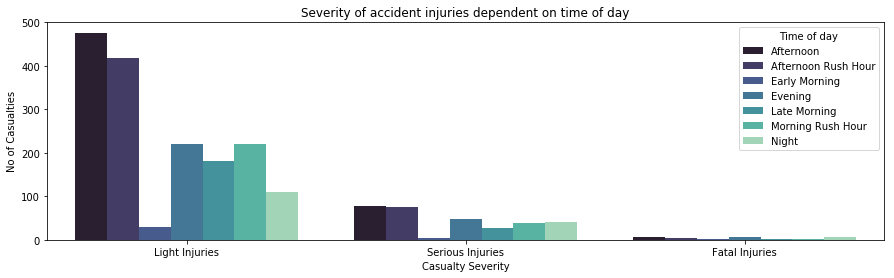

In [19]:
plt.figure(figsize=(15,4))
sns.barplot(x='Casualty Severity Description', 
            y='Casualty_Count', 
            hue = 'Time of day', 
            data=Time_of_day_danger, 
            orient='v',
           palette='mako')
plt.title('Severity of accident injuries dependent on time of day') 
plt.ylabel('No of Casualties')
plt.xlabel('Casualty Severity')
plt.show()

In [20]:
Severity_Time_of_day=df_2018.groupby(['Casualty Severity Description'])['Time of day'].value_counts(normalize=True)
Severity_Time_of_day

Casualty Severity Description  Time of day        
Fatal Injuries                 Evening                0.269231
                               Afternoon              0.230769
                               Night                  0.230769
                               Afternoon Rush Hour    0.153846
                               Early Morning          0.038462
                               Late Morning           0.038462
                               Morning Rush Hour      0.038462
Light Injuries                 Afternoon              0.287093
                               Afternoon Rush Hour    0.252714
                               Evening                0.133293
                               Morning Rush Hour      0.133293
                               Late Morning           0.109168
                               Night                  0.066345
                               Early Morning          0.018094
Serious Injuries               Afternoon              0.247588
    

Because the number of Fatal Injuries is very small, I merged the Fatal and Serious Injuries together and called the categorisation Serious or Fatal Injury.  
I also turned the Casual Severity score around, where Light Injuries would be valued as 1 and Serious and Fatal Injuries as 2 (before the Light Injury was value 3 which I found counter intuitive)

In [21]:
df_2018['Casualty Severity Description']=df_2018['Casualty Severity Description'].replace('Serious Injuries','Serious or Fatal Injuries')
df_2018['Casualty Severity Description']=df_2018['Casualty Severity Description'].replace('Fatal Injuries','Serious or Fatal Injuries')
df_2018['Casualty Severity']=df_2018['Casualty Severity'].replace(1,2)
df_2018['Casualty Severity']=df_2018['Casualty Severity'].replace(3,1)
df_2018[['Casualty Severity','Casualty Severity Description']].tail(10)

,Casualty Severity,Casualty Severity Description
1985,1,Light Injuries
1986,1,Light Injuries
1987,2,Serious or Fatal Injuries
1988,1,Light Injuries
1989,1,Light Injuries
1990,2,Serious or Fatal Injuries
1991,1,Light Injuries
1992,1,Light Injuries
1993,1,Light Injuries
1994,1,Light Injuries


Rerunning the Time of Day data value counts and graph again.

In [22]:
Time_of_day_casualties=df_2018.groupby(['Time of day'])['Casualty Severity Description'].value_counts()
Time_of_day_danger=pd.DataFrame(Time_of_day_casualties.reset_index(name = "Casualty_Count").sort_values(by=['Casualty_Count'], ascending=False))
Time_of_day_danger

,Time of day,Casualty Severity Description,Casualty_Count
0,Afternoon,Light Injuries,476
2,Afternoon Rush Hour,Light Injuries,419
6,Evening,Light Injuries,221
10,Morning Rush Hour,Light Injuries,221
8,Late Morning,Light Injuries,181
12,Night,Light Injuries,110
1,Afternoon,Serious or Fatal Injuries,83
3,Afternoon Rush Hour,Serious or Fatal Injuries,80
7,Evening,Serious or Fatal Injuries,55
13,Night,Serious or Fatal Injuries,48


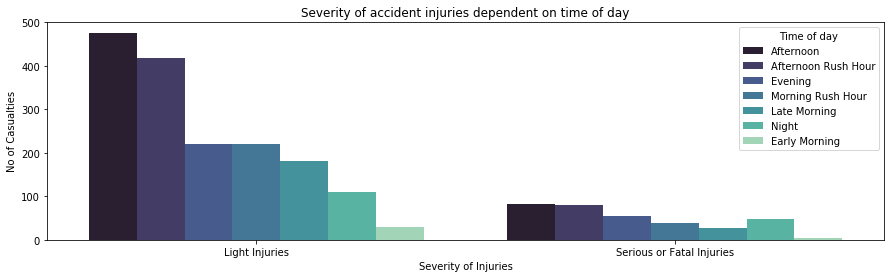

In [23]:
plt.figure(figsize=(15,4))
sns.barplot(x='Casualty Severity Description', 
            y='Casualty_Count', 
            hue = 'Time of day', 
            data=Time_of_day_danger, 
            orient='v',
           palette='mako')
plt.title('Severity of accident injuries dependent on time of day') 
plt.ylabel('No of Casualties')
plt.xlabel('Severity of Injuries')
plt.show()

In [24]:
Severity_Time_of_day=df_2018.groupby(['Casualty Severity Description'])['Time of day'].value_counts(normalize=True)
Severity_Time_of_day

Casualty Severity Description  Time of day        
Light Injuries                 Afternoon              0.287093
                               Afternoon Rush Hour    0.252714
                               Evening                0.133293
                               Morning Rush Hour      0.133293
                               Late Morning           0.109168
                               Night                  0.066345
                               Early Morning          0.018094
Serious or Fatal Injuries      Afternoon              0.246291
                               Afternoon Rush Hour    0.237389
                               Evening                0.163205
                               Night                  0.142433
                               Morning Rush Hour      0.115727
                               Late Morning           0.080119
                               Early Morning          0.014837
Name: Time of day, dtype: float64

### Seasonality

Add in a column to reflect seasonality

In [25]:
# make sure the date is understood as date by pandas
df_2018['Accident Date'] = pd.to_datetime(df_2018['Accident Date'])
df_2018['Accident Date'].head()

0   2018-11-01
1   2018-11-01
2   2018-11-01
3   2018-11-01
4   2018-11-01
Name: Accident Date, dtype: datetime64[ns]

In [26]:
df_2018['Season'] = np.where(((df_2018['Accident Date'] >= '2018-01-01') & (df_2018['Accident Date'] <= '2018-02-28')), 'Winter', 
                                np.where(((df_2018['Accident Date'] >= '2018-12-01') & (df_2018['Accident Date'] <= '2018-12-31')), 'Winter',
                                np.where(((df_2018['Accident Date'] >= '2018-03-01') & (df_2018['Accident Date'] <= '2018-05-31')), 'Spring',
                                np.where(((df_2018['Accident Date'] >= '2018-06-01') & (df_2018['Accident Date'] <= '2018-08-31')), 'Summer',
                                np.where(((df_2018['Accident Date'] >= '2018-09-01') & (df_2018['Accident Date'] <= '2018-11-30')), 'Autumn', 'NA'
                                )))))
df_2018.head()

,Accident Ref No,Number of Vehicles,Accident Date,Time (24hr),1st Road Class,Road Surface,Lighting Conditions,Weather Conditions,Type of Vehicle,Casualty Class,Casualty Severity,Sex of Casualty,Age of Casualty,Casualty Severity Description,Time of day,Season
0,51B0230,1,2018-11-01,700,6,1,4,1,9,3,1,2,87,Light Injuries,Morning Rush Hour,Autumn
1,51B0349,1,2018-11-01,855,6,2,1,1,11,2,1,2,60,Light Injuries,Morning Rush Hour,Autumn
2,51B0349,1,2018-11-01,855,6,2,1,1,11,2,1,2,51,Light Injuries,Morning Rush Hour,Autumn
3,51B0349,1,2018-11-01,855,6,2,1,1,11,2,1,2,50,Light Injuries,Morning Rush Hour,Autumn
4,51B0349,1,2018-11-01,855,6,2,1,1,11,2,1,2,51,Light Injuries,Morning Rush Hour,Autumn


In [27]:
Seasonal_casualties=df_2018.groupby(['Season'])['Casualty Severity Description'].value_counts()
Seasonal_danger=pd.DataFrame(Seasonal_casualties.reset_index(name = "Casualty_Count"))
Seasonal_danger

,Season,Casualty Severity Description,Casualty_Count
0,Autumn,Light Injuries,434
1,Autumn,Serious or Fatal Injuries,88
2,Spring,Light Injuries,424
3,Spring,Serious or Fatal Injuries,96
4,Summer,Light Injuries,422
5,Summer,Serious or Fatal Injuries,84
6,Winter,Light Injuries,378
7,Winter,Serious or Fatal Injuries,69


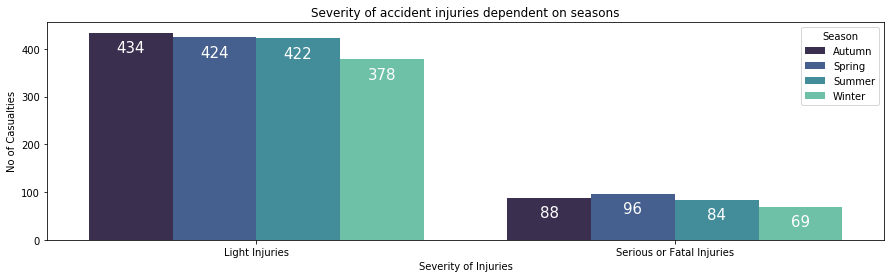

In [28]:
plt.figure(figsize=(15,4))
ax=sns.barplot(x='Casualty Severity Description', 
            y='Casualty_Count', 
            hue = 'Season', 
            data=Seasonal_danger, 
            orient='v',
           palette='mako')
for p in ax.patches:
             ax.annotate("%.f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=15, color='white', xytext=(0, -15),
                 textcoords='offset points')
plt.title('Severity of accident injuries dependent on seasons') 
plt.ylabel('No of Casualties')
plt.xlabel('Severity of Injuries')
plt.show()

In [29]:
Seasonal_casualties=df_2018.groupby(['Season'])['Casualty Severity Description'].value_counts(normalize=True)
Seasonal_casualties

Season  Casualty Severity Description
Autumn  Light Injuries                   0.831418
        Serious or Fatal Injuries        0.168582
Spring  Light Injuries                   0.815385
        Serious or Fatal Injuries        0.184615
Summer  Light Injuries                   0.833992
        Serious or Fatal Injuries        0.166008
Winter  Light Injuries                   0.845638
        Serious or Fatal Injuries        0.154362
Name: Casualty Severity Description, dtype: float64

### Road Class

In [30]:
##enter the descriptions of Road Class into df so we can clearly plot it with labels
df_2018['1st Road Class Descriptions'] = np.where(df_2018['1st Road Class'] == 1, 'Motorway', 
                                    np.where(df_2018['1st Road Class'] == 2, 'A', 
                                    np.where(df_2018['1st Road Class'] == 3, 'A(M)', 
                                    np.where(df_2018['1st Road Class'] == 4, 'B',
                                    np.where(df_2018['1st Road Class'] == 5, 'C',
                                    np.where(df_2018['1st Road Class'] == 6, 'Unclassified', 'NA'
                                    ))))))

In [31]:
df_2018['1st Road Class Descriptions'].value_counts(normalize=True).sort_values(ascending=False)

Unclassified    0.533333
A(M)            0.318797
Motorway        0.079198
B               0.034586
A               0.031579
C               0.002506
Name: 1st Road Class Descriptions, dtype: float64

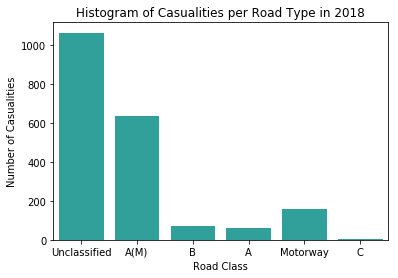

In [32]:
sns.countplot(x='1st Road Class Descriptions', data=df_2018, color='lightseagreen')
plt.title('Histogram of Casualities per Road Type in 2018') 
plt.ylabel('Number of Casualities')
plt.xlabel('Road Class')
plt.show()

As most of the data in this column is Unclassified, it's no use for me, so I drop the Road Class and Road Class Descriptions form DataFrame.

In [33]:
df_2018.drop(columns=['1st Road Class Descriptions','1st Road Class'], inplace=True)
df_2018.head()

,Accident Ref No,Number of Vehicles,Accident Date,Time (24hr),Road Surface,Lighting Conditions,Weather Conditions,Type of Vehicle,Casualty Class,Casualty Severity,Sex of Casualty,Age of Casualty,Casualty Severity Description,Time of day,Season
0,51B0230,1,2018-11-01,700,1,4,1,9,3,1,2,87,Light Injuries,Morning Rush Hour,Autumn
1,51B0349,1,2018-11-01,855,2,1,1,11,2,1,2,60,Light Injuries,Morning Rush Hour,Autumn
2,51B0349,1,2018-11-01,855,2,1,1,11,2,1,2,51,Light Injuries,Morning Rush Hour,Autumn
3,51B0349,1,2018-11-01,855,2,1,1,11,2,1,2,50,Light Injuries,Morning Rush Hour,Autumn
4,51B0349,1,2018-11-01,855,2,1,1,11,2,1,2,51,Light Injuries,Morning Rush Hour,Autumn


### Road Surface

In [34]:
##enter the descriptions of Road Surface into df so we can clearly plot it with labels
df_2018['Road Surface Descriptions'] = np.where(df_2018['Road Surface'] == 1, 'Dry', 
                                    np.where(df_2018['Road Surface'] == 2, 'Wet / Damp', 
                                    np.where(df_2018['Road Surface'] == 3, 'Snow', 
                                    np.where(df_2018['Road Surface'] == 4, 'Frost/Ice',
                                    np.where(df_2018['Road Surface'] == 5, 'Flood', 'NA'
                                    )))))

## do a quick count
df_2018['Road Surface Descriptions'].value_counts(normalize=True)

Dry           0.764912
Wet / Damp    0.213033
Snow          0.011028
Frost/Ice     0.010025
Flood         0.001003
Name: Road Surface Descriptions, dtype: float64

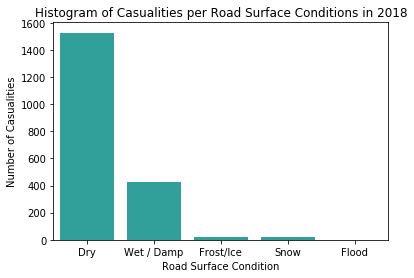

In [35]:
sns.countplot(x='Road Surface Descriptions', data=df_2018, color='lightseagreen')
plt.title('Histogram of Casualities per Road Surface Conditions in 2018') 
plt.ylabel('Number of Casualities')
plt.xlabel('Road Surface Condition')
plt.show()

In [36]:
Casualty_Severity_counts=df_2018.groupby(['Road Surface Descriptions'])['Casualty Severity Description'].value_counts(ascending=False)
Surface_Severity=pd.DataFrame(Casualty_Severity_counts.reset_index(name = "Casualty_Count").sort_values(by=['Casualty_Count'],ascending=False))
Surface_Severity.head(10)

,Road Surface Descriptions,Casualty Severity Description,Casualty_Count
0,Dry,Light Injuries,1271
7,Wet / Damp,Light Injuries,350
1,Dry,Serious or Fatal Injuries,255
8,Wet / Damp,Serious or Fatal Injuries,75
5,Snow,Light Injuries,19
3,Frost/Ice,Light Injuries,16
4,Frost/Ice,Serious or Fatal Injuries,4
6,Snow,Serious or Fatal Injuries,3
2,Flood,Light Injuries,2


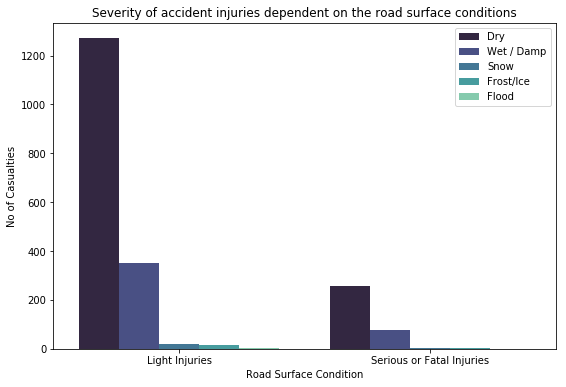

In [37]:
plt.figure(figsize=(9,6))
ax=sns.barplot(x='Casualty Severity Description', 
            y='Casualty_Count', 
            hue = 'Road Surface Descriptions', 
            data=Surface_Severity, 
            orient='v',
           palette='mako')
plt.legend(loc='upper right')
plt.title('Severity of accident injuries dependent on the road surface conditions') 
plt.ylabel('No of Casualties')
plt.xlabel('Road Surface Condition')
plt.show()

In [38]:
Casualty_Severity_counts=df_2018.groupby(['Road Surface Descriptions'])['Casualty Severity Description'].value_counts(normalize=True)
Casualty_Severity_counts

Road Surface Descriptions  Casualty Severity Description
Dry                        Light Injuries                   0.832896
                           Serious or Fatal Injuries        0.167104
Flood                      Light Injuries                   1.000000
Frost/Ice                  Light Injuries                   0.800000
                           Serious or Fatal Injuries        0.200000
Snow                       Light Injuries                   0.863636
                           Serious or Fatal Injuries        0.136364
Wet / Damp                 Light Injuries                   0.823529
                           Serious or Fatal Injuries        0.176471
Name: Casualty Severity Description, dtype: float64

### Lighting Conditions

In [39]:
df_2018['Lighting Conditions']=df_2018['Lighting Conditions'].replace(2,1)
df_2018['Lighting Conditions']=df_2018['Lighting Conditions'].replace(3,1)
df_2018['Lighting Conditions']=df_2018['Lighting Conditions'].replace(4,2)
df_2018['Lighting Conditions']=df_2018['Lighting Conditions'].replace(5,3)
df_2018['Lighting Conditions']=df_2018['Lighting Conditions'].replace(6,3)
df_2018['Lighting Conditions']=df_2018['Lighting Conditions'].replace(7,4)
df_2018['Lighting Descriptions'] = np.where(df_2018['Lighting Conditions'] == 1, 'Daylight', 
                                np.where(df_2018['Lighting Conditions'] == 2, 'Dark, street lights', 
                                np.where(df_2018['Lighting Conditions'] == 3, 'Dark, no lights', 
                                np.where(df_2018['Lighting Conditions'] == 4, 'Dark, lighting conditions unknown','NA'
                                ))))

In [40]:
Lighting=df_2018['Lighting Conditions'].value_counts()
Lighting

1    1443
2     458
3      54
4      40
Name: Lighting Conditions, dtype: int64

In [41]:
Casualty_Severity_Lighting=df_2018.groupby(['Lighting Descriptions'])['Casualty Severity Description'].value_counts()
Lighting_Severity=pd.DataFrame(Casualty_Severity_Lighting.reset_index(name = "Casualty_Count").sort_values(by=['Casualty_Count'],ascending=False))
Lighting_Severity.head(10)

,Lighting Descriptions,Casualty Severity Description,Casualty_Count
6,Daylight,Light Injuries,1213
4,"Dark, street lights",Light Injuries,365
7,Daylight,Serious or Fatal Injuries,230
5,"Dark, street lights",Serious or Fatal Injuries,93
2,"Dark, no lights",Light Injuries,43
0,"Dark, lighting conditions unknown",Light Injuries,37
3,"Dark, no lights",Serious or Fatal Injuries,11
1,"Dark, lighting conditions unknown",Serious or Fatal Injuries,3


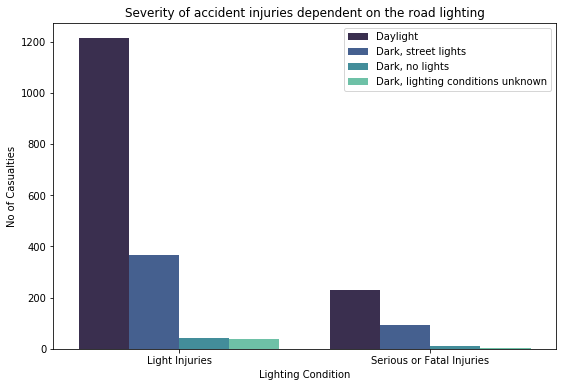

In [43]:
plt.figure(figsize=(9,6))
ax=sns.barplot(x='Casualty Severity Description', 
            y='Casualty_Count', 
            hue = 'Lighting Descriptions', 
            data=Lighting_Severity, 
            orient='v',
           palette='mako')
plt.legend(loc='upper right')
plt.title('Severity of accident injuries dependent on the road lighting') 
plt.ylabel('No of Casualties')
plt.xlabel('Lighting Condition')
plt.show()

In [48]:
Lighting_casualties=df_2018.groupby(['Lighting Descriptions'])['Casualty Severity Description'].value_counts(normalize=True, ascending=False)
Lighting_casualties

Lighting Descriptions              Casualty Severity Description
Dark, lighting conditions unknown  Light Injuries                   0.925000
                                   Serious or Fatal Injuries        0.075000
Dark, no lights                    Light Injuries                   0.796296
                                   Serious or Fatal Injuries        0.203704
Dark, street lights                Light Injuries                   0.796943
                                   Serious or Fatal Injuries        0.203057
Daylight                           Light Injuries                   0.840610
                                   Serious or Fatal Injuries        0.159390
Name: Casualty Severity Description, dtype: float64